In [13]:
#트리 모형
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
#꽃잎의 가로, 세로 길이
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2,
random_state=10)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=10)

In [14]:
from sklearn.tree import export_graphviz

#그래프 정보를 파일로 저장
export_graphviz(
    tree_clf,
    out_file='c:/data/iris/iris_tree.dot',
    feature_names=['petal length', 'petal width'],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

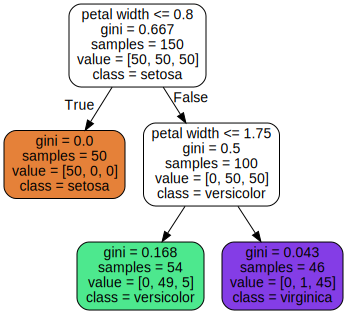

In [15]:
import graphviz
with open('c:/data/iris/iris_tree.dot') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='iris_tree', directory='c:/data/iris')
dot

In [16]:
#의사결정나무의 결정 경계 그래프
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[0,7.5,0,3], iris=True, legend=False,
plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    
    if plot_training:
        plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo', label='Iris-Setosa')
        plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs', label='Iris-Versicolor')
        plt.plot(X[:,0][y==2], X[:,1][y==2], 'g^', label='Iris-Virginica')
        plt.axis(axes)
    if iris:
        plt.xlabel('petal length', fontsize=14)
        plt.ylabel('petal width', fontsize=14)
    else:
        plt.xlabel(r'$x_1$', fontsize=18)
        plt.ylabel(r'$x_2$', fontsize=18, rotation=0)
    if legend:
        plt.legend(loc='lower right', fontsize=14)

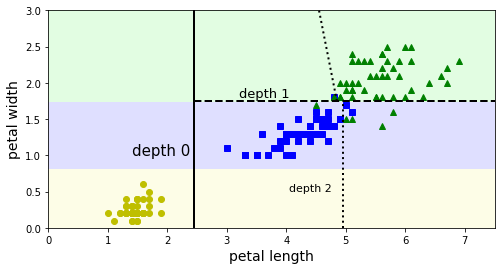

In [17]:
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45,2.45], [0,3], 'k-', linewidth=2)
plt.plot([2.45,7.5],[1.75,1.75],'k--',linewidth=2)
plt.plot([4.95,4.95],[0,1.75],'k:', linewidth=2)
plt.plot([4.85,4.55],[1.75,3],'k:', linewidth=2)

plt.text(1.40, 1.0, 'depth 0', fontsize=15)
plt.text(3.2, 1.80, 'depth 1', fontsize=13)
plt.text(4.05, 0.5, 'depth 2', fontsize=11)

plt.show()

In [18]:
#분류라벨 확률추정함수
# 새로운 값 입력[5, 1.5]
result = tree_clf.predict_proba([[5, 1.5]])
print(result)

#0,1,2일 확률
print(np.argmax(result)) # 최대값의 인덱스
#(0일 확률, 1일 확률, 2일 확률) 중 1일 확률이 가장 높음
print(tree_clf.predict([[5, 1.5]]))

[[0.         0.90740741 0.09259259]]
1
[1]


In [19]:
# 트리의 단점: outlier 또는 특정 샘플에 민감함
# 가장 너비가 큰 Iris-Versicolor
X[(X[:,1]==X[:,1][y==1].max()) & (y==1)]

array([[4.8, 1.8]])

In [20]:
#위의 값을 제거한 데이터로 만든 모형
not_widest_versicolor = (X[:,1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2,
random_state=10)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=10)

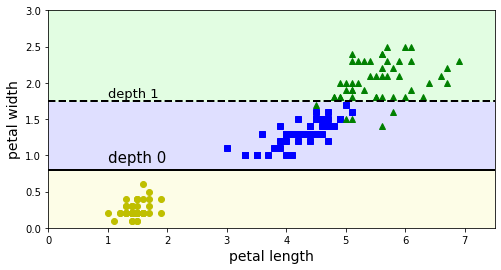

In [21]:
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], 'k-', linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], 'k--', linewidth=2)
plt.text(1.0, 0.9, 'depth 0', fontsize=15)
plt.text(1.0, 1.80, 'depth 1', fontsize=13)

plt.show()

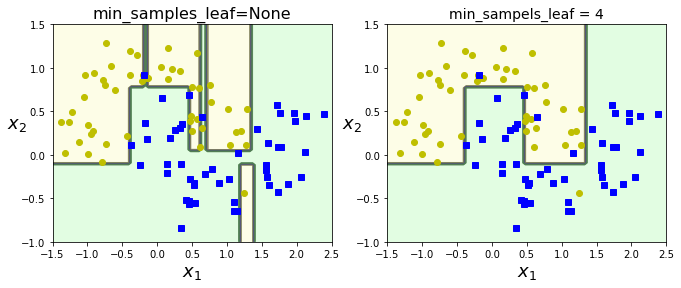

In [22]:
#과적합을 방지하기 위한 방법 - 규제
# min_samples_leaf : 리프 노드가 가지고 있어야 할 최소 샘플 수
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

# min_samples_leaf를 4개로 제한하지 않은 모형
deep_tree_clf1 = DecisionTreeClassifier(random_state=10)
# min_samples_leaf를 4개로 제한한 모형
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=10)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title('min_samples_leaf=None', fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5,2.5,-1,1.5], iris=False)
plt.title('min_sampels_leaf = {}'.format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

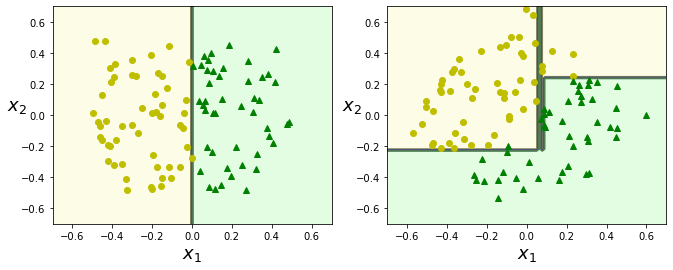

In [23]:
#의사결정나무모형의 단점 : 계단 모양의 결정 경계를 만들게 됨
np.random.seed(10)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), - np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=10)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=10)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7,0.7,-0.7,0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.show()

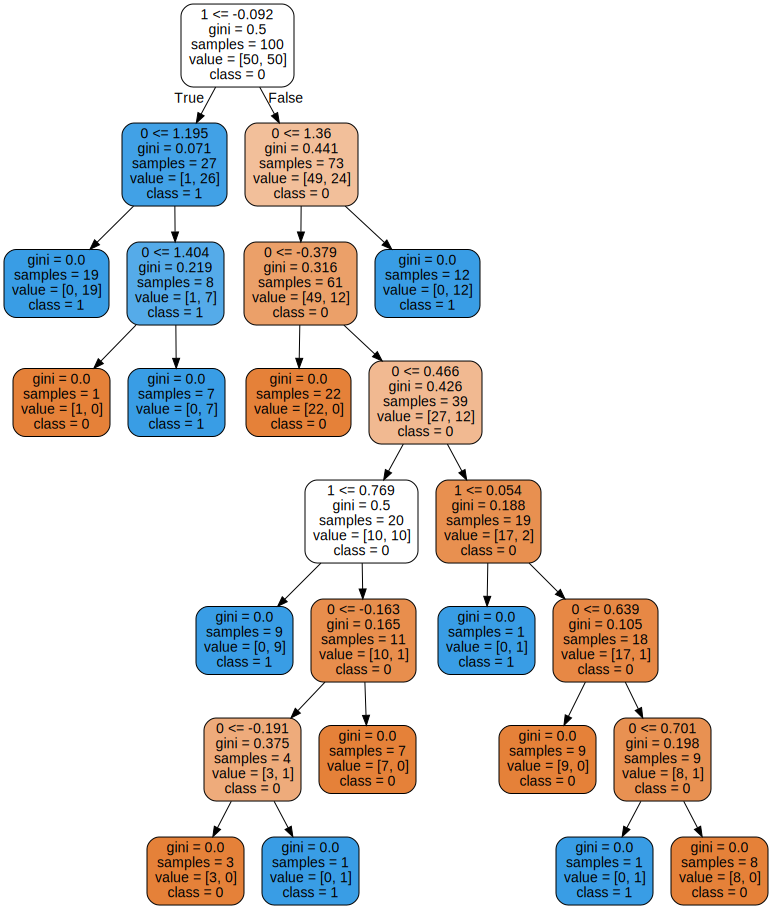

In [30]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(
    deep_tree_clf1,
    out_file='c:/data/tree/tree.dot',
    feature_names=['0', '1'],
    class_names=['0','1'],
    rounded=True,
    filled=True
)

with open('c:/data/tree/tree.dot') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='tree', directory='c:/data/tree')
dot

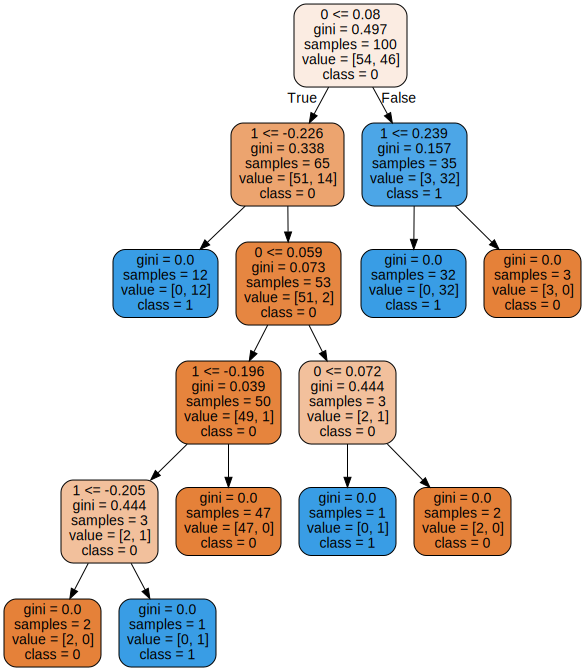

In [31]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(
    tree_clf_sr,
    out_file='c:/data/tree/tree_clf_sr.dot',
    feature_names=['0', '1'],
    class_names=['0','1'],
    rounded=True,
    filled=True
)

with open('c:/data/tree/tree_clf_sr.dot') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='tree_clf_sr', directory='c:/data/tree')
dot

In [33]:
#회귀트리모형
#노이즈가 추가된 데이터셋
np.random.seed(42)
m = 200
X = np.random.rand(m,1)
y = 4*(X-0.5) ** 2
y = y + np.random.randn(m,1) / 10

In [34]:
#회귀 트리 모형
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2,
random_state=10)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=10)

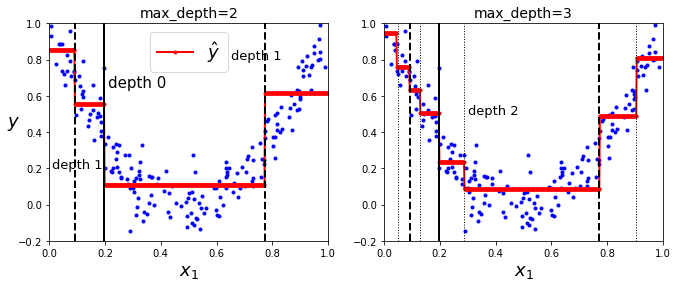

In [36]:
#소스복사
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=10, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=10, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes = [0,1,-0.2,1], ylabel='$y$'):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel('$x_1$', fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, 'b.')
    plt.plot(x1, y_pred, 'r.-', linewidth=2, label=r'$\hat{y}$')

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, 'k-'), (0.0917, 'k--'), (0.7718, 'k--')):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)

plt.text(0.21, 0.65, 'depth 0', fontsize=15)
plt.text(0.01, 0.2, 'depth 1', fontsize=13)
plt.text(0.65, 0.8, 'depth 1', fontsize=13)
plt.legend(loc='upper center', fontsize=18)
plt.title('max_depth=2', fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, 'k-'), (0.0917, 'k--'), (0.7718, 'k--')):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in  (0.0485, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], 'k:', linewidth=1)

plt.text(0.3, 0.5, 'depth 2', fontsize=13)
plt.title('max_depth=3', fontsize=14)

plt.show()

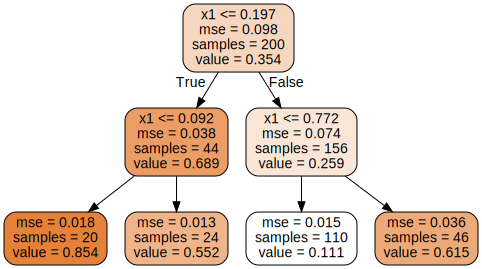

In [37]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(
    tree_reg1,
    out_file='c:/data/tree/regression_tree.dot',
    feature_names=['x1'],
    rounded=True,
    filled=True
)

with open('c:/data/tree/regression_tree.dot') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='regression_tree', directory='c:/data/tree')
dot